In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('normalised_sentiment_data.csv')
print(df.head())

             Title                        Artist  Year Position   Ave BPM  \
0  Goodnight Irene  Gordon Jenkins & The Weavers  1950        1  0.047619   
1        Mona Lisa                 Nat King Cole  1950        2 -0.757576   
2  Third Man Theme                   Anton Karas  1950        3  0.520408   
3       Sam's Song            Gary & Bing Crosby  1950        4  0.333333   
4    Simple Melody            Gary & Bing Crosby  1950        5  0.726190   

   Ave Pitch STD  Ave Pitch Value  Pitch Variation  Pitch Range  \
0       3.110000         0.173152         0.500000     0.724138   
1       4.115000        -0.496504         0.346154     0.241379   
2       5.047143         0.240631         0.538462     0.551724   
3       3.045000         0.170365         0.423077     0.310345   
4       3.065000        -0.411212         0.269231     0.172414   

   Mode Polarity  Note Onset Density  
0            1.0           -0.536313  
1            1.0           -0.597765  
2            1.0 

In [3]:
# BPM: positive -> high arousal
# Pitch value: positive -> high valence
# Pitch variation: positive -> high arousal AND high valence; negative -> ONLY low arousal
# Pitch range: positive -> high valence; negative -> low valence AND high arousal
# Mode polatity: positive -> high valence
# note onset density: positive -> high arousal

In [6]:
df['Arousal'] = sum([df['Ave BPM'], df['Pitch Variation'], df['Note Onset Density']])

# only add pitch range to arousal if it's negative
df['Arousal'] = np.where(
    df['Pitch Range'] < 0,
    df['Arousal'] + df['Pitch Range'],
    df['Arousal']
)

df['Valence'] = sum([df['Ave Pitch Value'] + df['Pitch Range'] + df['Mode Polarity']])

# only add pitch variation to valence if it's positive
df['Valence'] = np.where(
    df['Pitch Variation'] > 0,
    df['Valence'] + df['Pitch Variation'],
    df['Valence']
)

In [7]:
print(df.head())

             Title                        Artist  Year Position   Ave BPM  \
0  Goodnight Irene  Gordon Jenkins & The Weavers  1950        1  0.047619   
1        Mona Lisa                 Nat King Cole  1950        2 -0.757576   
2  Third Man Theme                   Anton Karas  1950        3  0.520408   
3       Sam's Song            Gary & Bing Crosby  1950        4  0.333333   
4    Simple Melody            Gary & Bing Crosby  1950        5  0.726190   

   Ave Pitch STD  Ave Pitch Value  Pitch Variation  Pitch Range  \
0       3.110000         0.173152         0.500000     0.724138   
1       4.115000        -0.496504         0.346154     0.241379   
2       5.047143         0.240631         0.538462     0.551724   
3       3.045000         0.170365         0.423077     0.310345   
4       3.065000        -0.411212         0.269231     0.172414   

   Mode Polarity  Note Onset Density   Arousal   Valence  
0            1.0           -0.536313  0.011306  2.397290  
1            1.0

In [11]:
col         = 'Quadrant'
conditions = [
    (df['Valence'] > 0) & (df['Arousal'] > 0),  # Q1
    (df['Valence'] < 0) & (df['Arousal'] < 0),  # Q3
    (df['Valence'] > 0) & (df['Arousal'] < 0),  # Q2
    (df['Valence'] < 0) & (df['Arousal'] > 0)   # Q4
]

choices     = [ "Q1", 'Q3', 'Q2', 'Q4' ]

df[col] = np.select(conditions, choices, default='')
    
print(df.head())

             Title                        Artist  Year Position   Ave BPM  \
0  Goodnight Irene  Gordon Jenkins & The Weavers  1950        1  0.047619   
1        Mona Lisa                 Nat King Cole  1950        2 -0.757576   
2  Third Man Theme                   Anton Karas  1950        3  0.520408   
3       Sam's Song            Gary & Bing Crosby  1950        4  0.333333   
4    Simple Melody            Gary & Bing Crosby  1950        5  0.726190   

   Ave Pitch STD  Ave Pitch Value  Pitch Variation  Pitch Range  \
0       3.110000         0.173152         0.500000     0.724138   
1       4.115000        -0.496504         0.346154     0.241379   
2       5.047143         0.240631         0.538462     0.551724   
3       3.045000         0.170365         0.423077     0.310345   
4       3.065000        -0.411212         0.269231     0.172414   

   Mode Polarity  Note Onset Density   Arousal   Valence Quadrant  
0            1.0           -0.536313  0.011306  2.397290       Q1 

In [31]:
import matplotlib.pyplot as plt

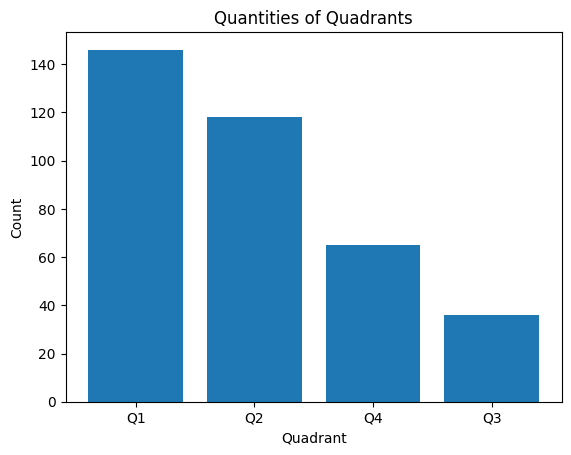

In [33]:
# Count the occurrences of each quadrant
quadrant_counts = df['Quadrant'].value_counts()

# Create the bar chart
plt.bar(quadrant_counts.index, quadrant_counts.values, width=0.8, align='center')

# Add labels and title
plt.xlabel('Quadrant')
plt.ylabel('Count')
plt.title('Quantities of Quadrants')

# Show the plot
plt.show()
